In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# df=pd.read_csv('dataset.csv')
df=pd.read_csv('ratio_dataset.csv')
df = df.drop(columns=['step','nameOrig', 'nameDest','isFlaggedFraud'])
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [3]:
df['type']=df['type'].map({'PAYMENT':2, 'TRANSFER':4, 'CASH_OUT':1, 'DEBIT':5, 'CASH_IN':3})

In [4]:
x=df[['type','amount','oldbalanceOrg','newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y=df.iloc[:,-1]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.ensemble import AdaBoostClassifier
modelABC = AdaBoostClassifier()
modelABC.fit(x_train, y_train)

# x_test_selected = selector.transform(x_test)
y_pred = modelABC.predict(x_test)
# print(y_pred)

c:\Users\srini\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [7]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)

99.48320413436691


In [8]:
resultABC = modelABC.predict(x_test)

In [9]:
classification_report_RFC = classification_report(y_test, resultABC)
print(classification_report_RFC)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       768
           1       0.75      0.50      0.60         6

    accuracy                           0.99       774
   macro avg       0.87      0.75      0.80       774
weighted avg       0.99      0.99      0.99       774



Text(0.5, 1.0, 'Accuracy Score: 99.48320413436691')

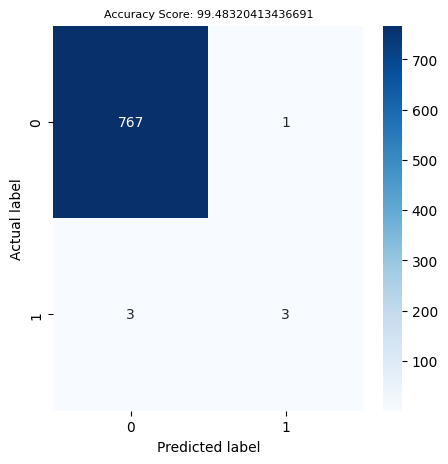

In [10]:
plt.figure(figsize=(5,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred),fmt='.0f',annot= True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(modelABC.score(x_test, y_test)*100)
plt.title(all_sample_title, size = 8)

In [11]:
import pickle

with open('pkl_models/ABC_model.pkl', 'wb') as model_file:
    pickle.dump(modelABC, model_file, protocol=2)